In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('../Ficheros/attack_limpieza2.csv', index_col=0)

1- Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [6]:
# establecer el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (15, 10)

2- Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [8]:
df= df.drop(["Unnamed: 0.1"], axis=1)

In [29]:
ataques_pais = pd.DataFrame(df.groupby("country").size().reset_index())

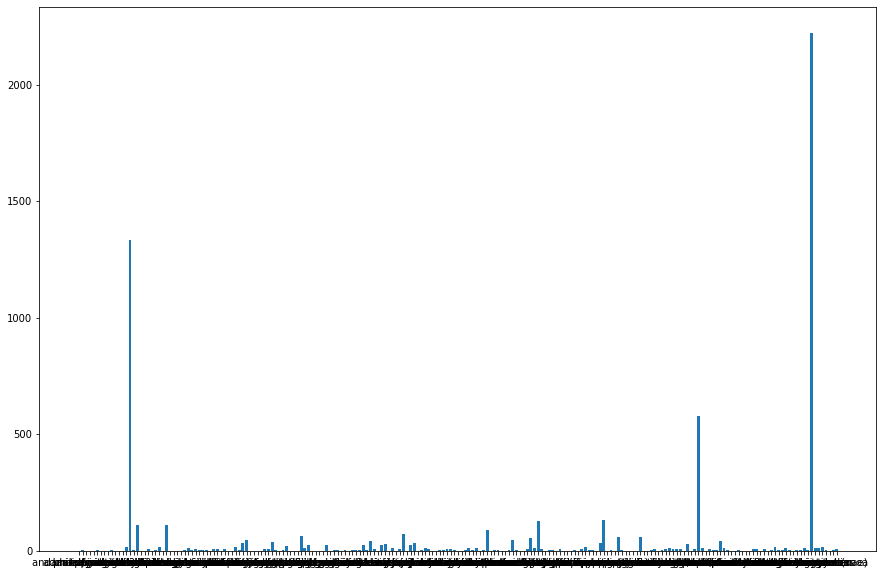

In [36]:
plt.figure()
x = ataques_pais["country"]
y = ataques_pais[0]
plt.bar(x, y)
plt.show()

In [37]:
ataques_pais_ordenado = ataques_pais.sort_values(0, ascending = False)
ataques_diez = ataques_pais_ordenado.head(10)

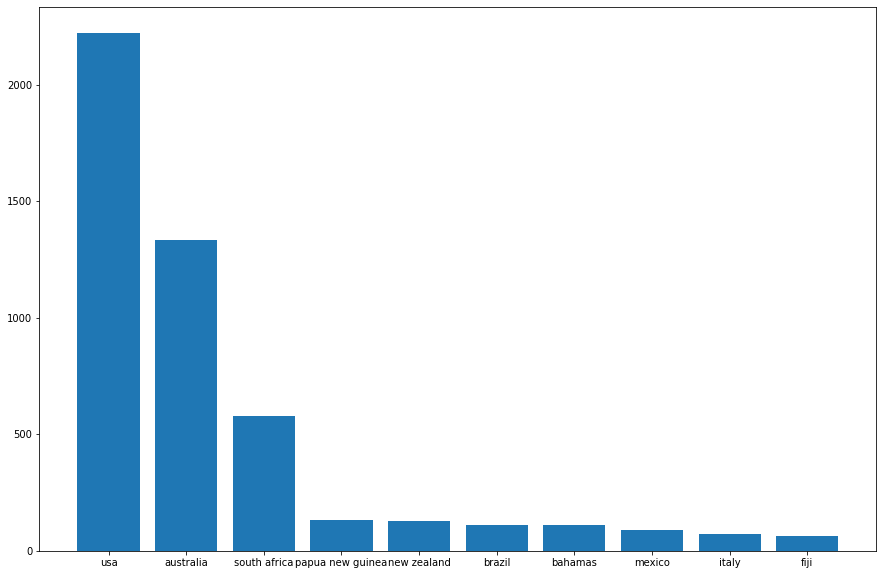

In [38]:
plt.figure()
x = ataques_diez["country"]
y = ataques_diez[0]
plt.bar(x, y)
plt.show()

In [65]:
ataques_diez["country"].unique()

array(['usa', 'australia', 'south africa', 'papua new guinea',
       'new zealand', 'brazil', 'bahamas', 'mexico', 'italy', 'fiji'],
      dtype=object)

Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [63]:
pais_sexo = df[["country", "sex2"]]
x = pais_sexo.groupby(["country", "sex2"]).size()

In [64]:
pd.DataFrame(x)


,,0
country,sex2,
philippines,M,1
tonga,M,3
admiralty islands,M,1
africa,M,1
algeria,M,1
...,...,...
vietnam,M,11
west indies,M,2
western samoa,M,1


In [87]:
pais_sexo = df[(df["country"] == 'usa') | (df["country"] == 'australia') | (df["country"] == 'south africa') | (df["country"] == 'papua new guinea') | (df["country"] == 'new zealand') | (df["country"] == 'brazil') | (df["country"] == 'bahamas') | (df["country"] == 'mexico') | (df["country"] == 'italy') | (df["country"] == 'fiji')]
pais_sexo_10 = pd.DataFrame(pais_sexo.groupby(["country", "sex2"]).size().reset_index())

In [88]:
pais_sexo_10

,country,sex2,0
0,australia,F,89
1,australia,M,1105
2,bahamas,F,15
3,bahamas,M,92
4,brazil,F,5
5,brazil,M,93
6,fiji,F,8
7,fiji,M,50
8,italy,F,2
9,italy,M,56


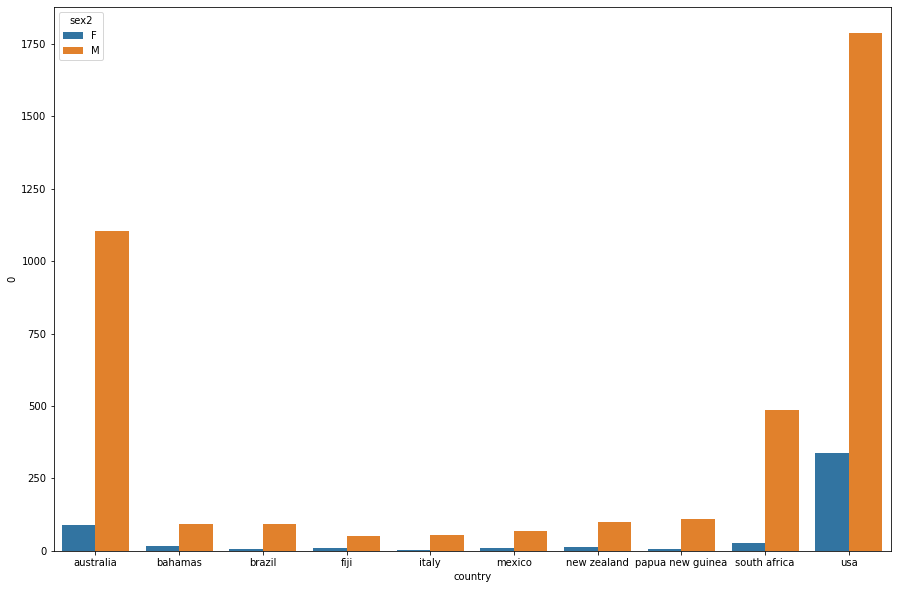

In [96]:
plt.figure()
fig = sns.barplot(x='country',y = 0, data = pais_sexo_10, hue = "sex2")
plt.show()


¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

Ataques entre sexos, ¿hay diferencia?

¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.